In [1]:
pip install certifi python-dotenv pandas pymongo

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install "vegafusion[embed]>=1.4.0"


     ---------------------------------------- 43.9/43.9 kB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 24.6/24.6 MB 9.0 MB/s eta 0:00:00
     ---------------------------------------- 27.1/27.1 MB 8.8 MB/s eta 0:00:00
     ---------------------------------------- 19.1/19.1 MB 9.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
from os import getenv
from certifi import where
from dotenv import load_dotenv
from pandas import DataFrame
from pymongo import MongoClient

# Class definition
class Database:
    def __init__(self) -> None:
        load_dotenv()
        self.database = MongoClient(getenv("DB_URL"), tlsCAFile=where())["Database"]
        self.collection = self.database.get_collection("Monsters")

    def dataframe(self) -> DataFrame:
        return DataFrame(list(self.collection.find({}, {"_id": False})))

# After defining the class, create an instance and call the method
db = Database()
df = db.dataframe()
df.head()


,Name,Type,Level,Rarity,Damage,Health,Energy,Sanity,Timestamp
0,Emerald Faerie,Fey,8,Rank 3,8d8+1,67.12,66.08,63.85,2023-11-16 16:37:33
1,Quasit,Demonic,11,Rank 3,11d8+1,86.16,86.83,89.67,2023-11-16 16:37:33
2,Ruby Dragon,Dragon,9,Rank 1,9d4,36.74,35.05,35.29,2023-11-16 16:37:33
3,Ghostly Guard,Undead,6,Rank 3,6d8+1,46.92,50.31,49.65,2023-11-16 16:37:33
4,Hook Horror,Demonic,4,Rank 0,4d2+3,8.56,8.32,7.04,2023-11-16 16:37:33


             Level       Health       Energy       Sanity
count  8192.000000  8192.000000  8192.000000  8192.000000
mean      7.873169    39.602018    39.609530    39.627582
std       4.541258    34.577519    34.597897    34.613814
min       1.000000     1.050000     1.050000     1.010000
25%       4.000000    15.097500    15.042500    15.100000
50%       7.000000    28.425000    28.350000    28.400000
75%      11.000000    53.602500    53.700000    53.567500
max      20.000000   220.520000   220.510000   221.350000


array([[<Axes: title={'center': 'Level'}>,
        <Axes: title={'center': 'Health'}>],
       [<Axes: title={'center': 'Energy'}>,
        <Axes: title={'center': 'Sanity'}>]], dtype=object)

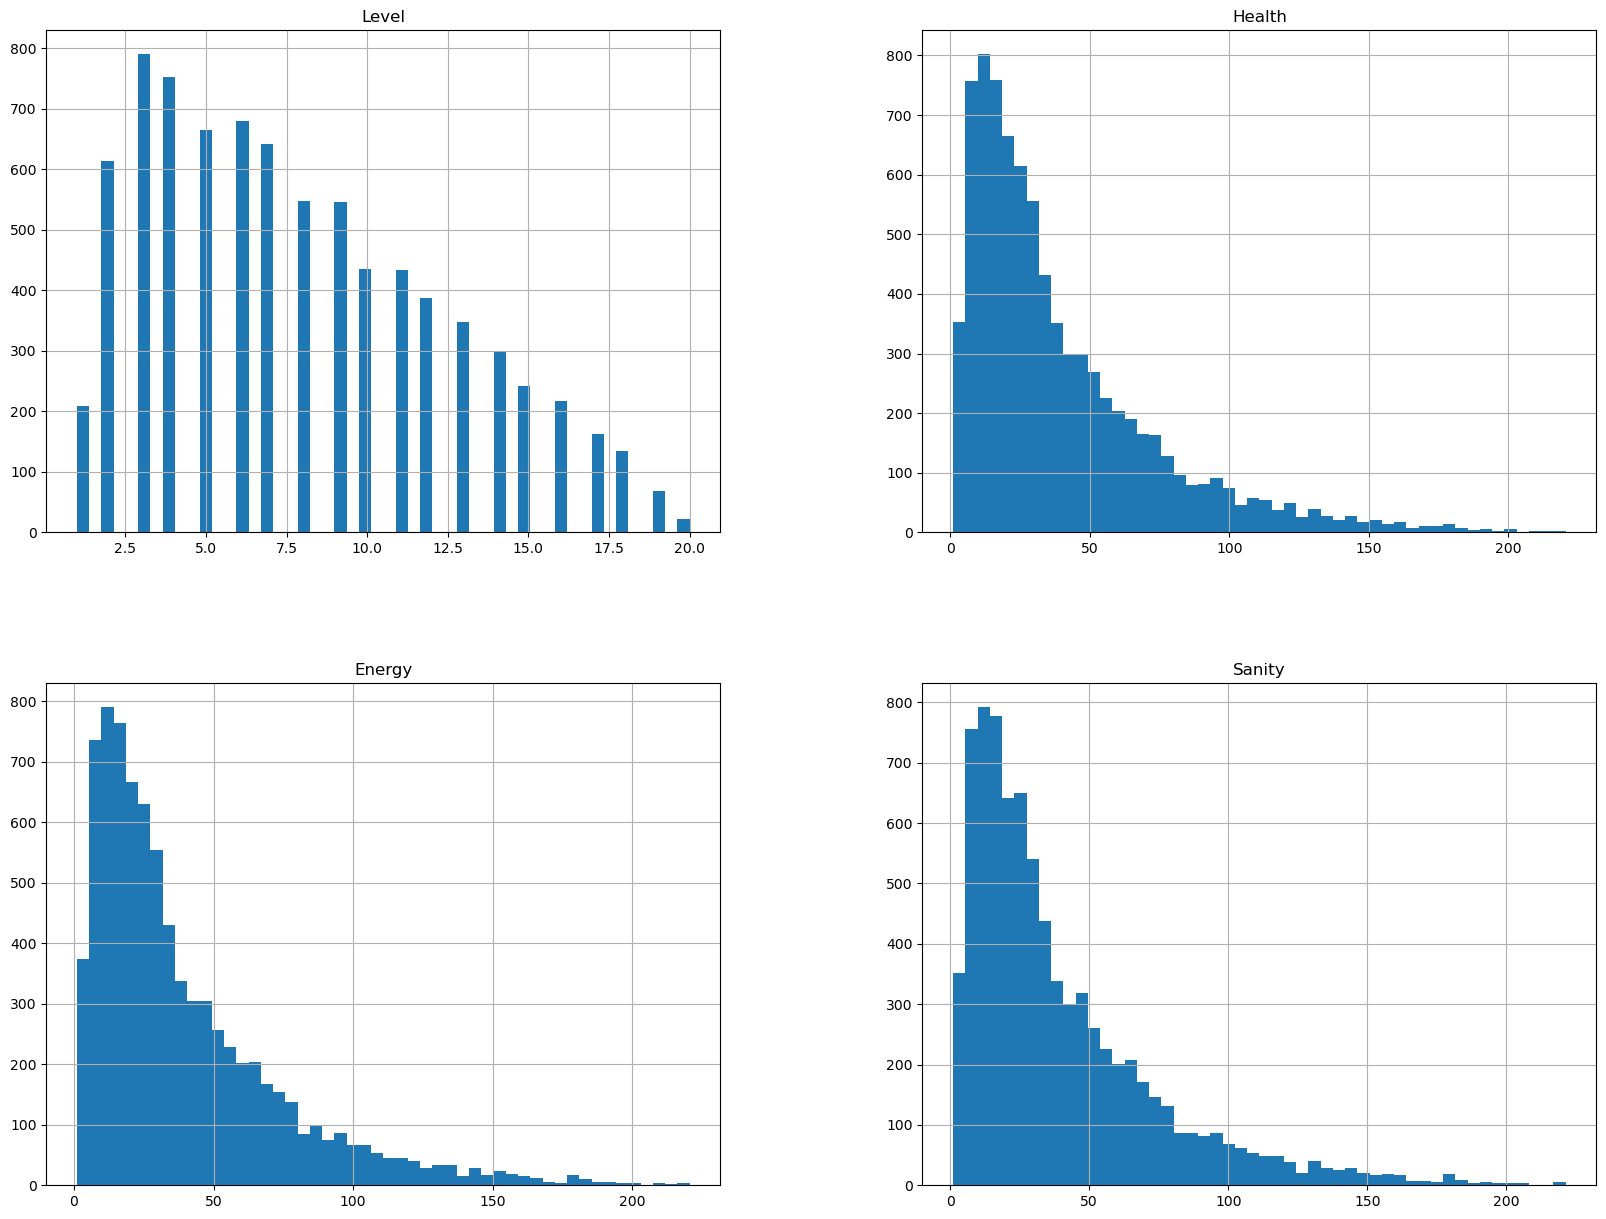

In [3]:
# Do some data exploration
print(df.describe())

df.hist(bins=50, figsize=(20,15))

In [5]:
import altair as alt

# Since the dataset seems large, we use sample to avoid overplotting
sampled_df = df.sample(n=500, random_state=1)

alt.Chart(sampled_df).mark_circle().encode(
    alt.X('Energy:O'),  # Treat level as ordinal data
    alt.Y('Health:Q'), # Treat Health as quantitative data
    alt.Size('Energy:Q'),  # Size by Energy
    alt.Color('Sanity:Q'),  # Color by Sanity
    tooltip=['Level', 'Health', 'Energy', 'Sanity']
).interactive()  # This makes the chart interactive


alt.Chart(...)

In [4]:
alt.data_transformers.enable("vegafusion")

alt.Chart(df).mark_bar(
    cornerRadiusTopLeft=3,
    cornerRadiusTopRight=3
).encode(
    x='Type:O',
    y='count():Q',
    color='Characteristics:N'
)

ValueError: DataFusion error: Schema error: No field named "Characteristics". Valid fields are __count, _vf_order, "Type".
    Context[0]: Failed to get node value


alt.Chart(...)